In [1]:
import glob
import random

from ultralytics import YOLO

import numpy as np

from keyrover import *
from keyrover.vision import crop_rect

In [2]:
# model = YOLO("models/yolo/train4/weights/best.pt")
model = YOLO("models/yolo-multiclass/train/weights/best.pt")

In [3]:
random.choice(glob.glob(f"{YOLO_MULTI_DATASET}/valid/images/*"))

'datasets/yolo-multiclass/valid/images/430.jpg'

datasets/yolo-multiclass/valid/images/1684.jpg

image 1/1 /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo-multiclass/valid/images/1684.jpg: 480x640 1 Q, 1 W, 2 Es, 1 R, 3 Ts, 3 Ys, 3 Us, 3 Is, 2 Os, 3 Ps, 4 [s, 1 ], 1 space, 1 up, 3 lefts, 1 down, 3 deletes, 1 end, 1 pg down, 3 inserts, 1 home, 1 pg up, 1 pause, 1 backspace, 1 rshift, 3 rcontrols, 1 menu, 1 fn, 2 ralts, 1 lalt, 2 windowss, 1 lcontrol, 2 lshifts, 1 ltab, 1 f9, 3 f10s, 5 f11s, 1 f12, 6 f5s, 3 f6s, 4 f7s, 4 f8s, 1 f2, 3 f4s, 2 `s, 1 2, 2 3s, 2 4s, 4 5s, 4 6s, 4 7s, 2 8s, 2 9s, 3 0s, 5 -s, 4 +s, 3 Zs, 1 X, 1 C, 1 V, 5 Bs, 2 Ns, 3 Ms, 3 <s, 4 >s, 2 ?s, 2 As, 1 S, 1 F, 4 Gs, 4 Hs, 2 Ks, 3 Ls, 3 ;s, 1 ", 1 caps lock, 1 enter, 1 |, 39.5ms
Speed: 1.0ms preprocess, 39.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


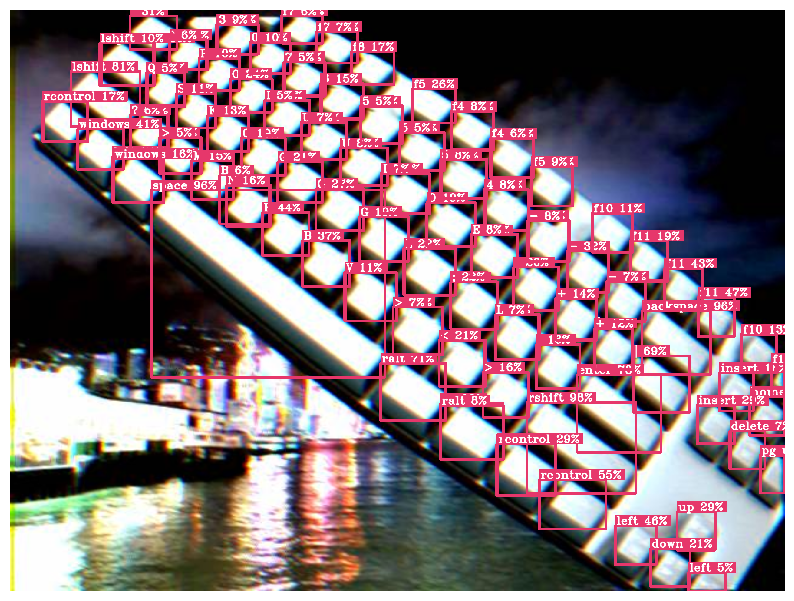

In [12]:
path = random.choice(glob.glob(f"{YOLO_MULTI_DATASET}/valid/images/*"))
print(path)
pred = model.predict(path, conf=0.05)[0]
plot_yolo(pred)

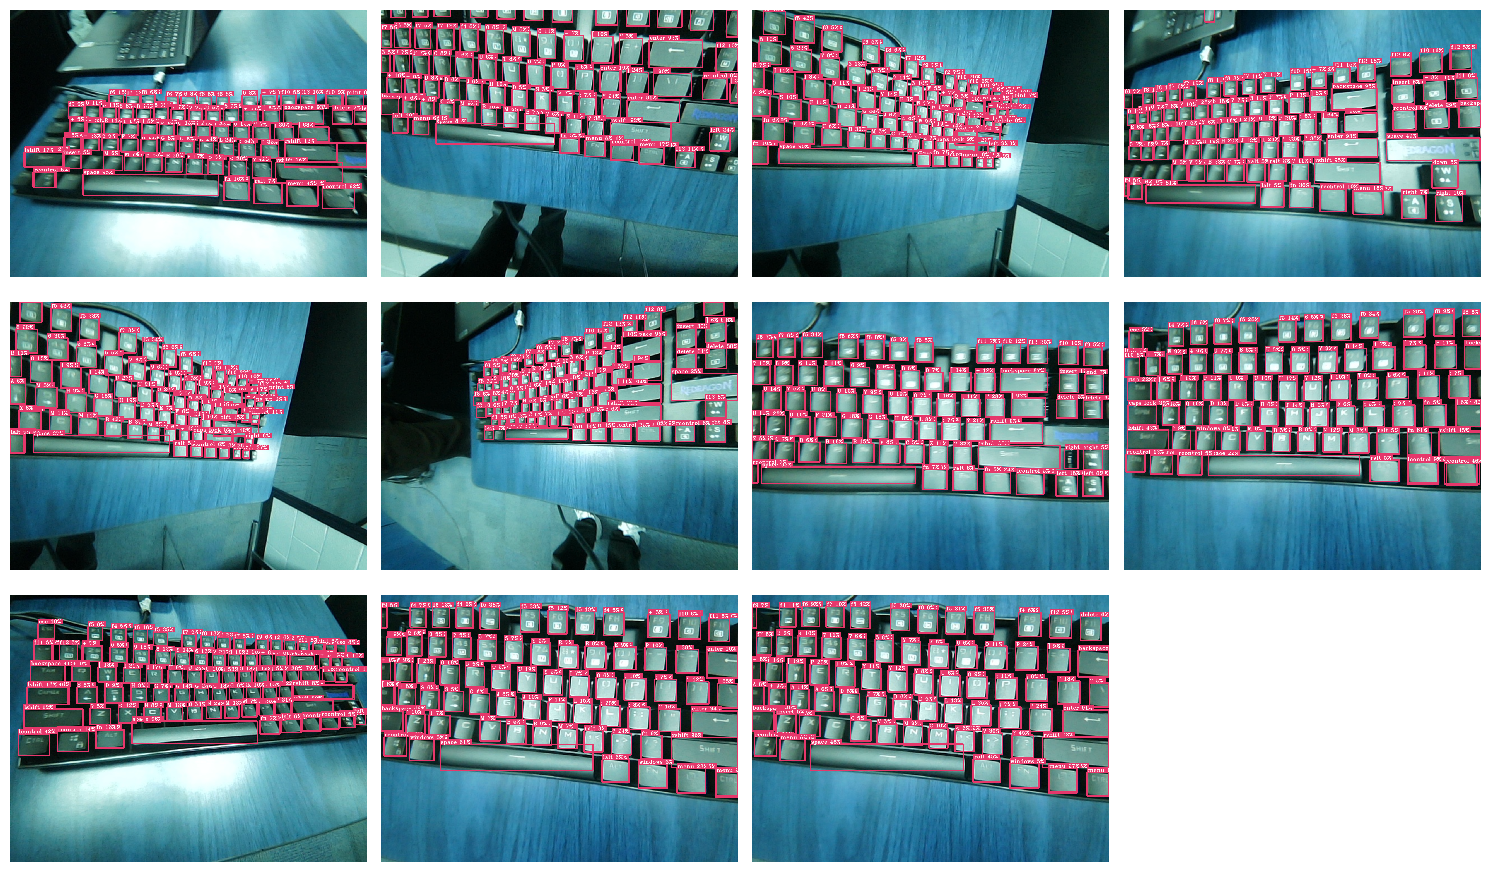

In [14]:
predictions = model.predict([p for p in glob.glob(f"{TEST_DATASET}/*")], iou=0.25, conf=0.05, verbose=False)
images = [plot_yolo(pred, plot=False, scale=2) for pred in predictions]
show_images(images, figsize=(15, 9))

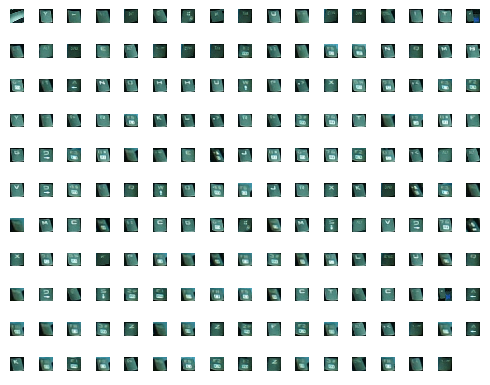

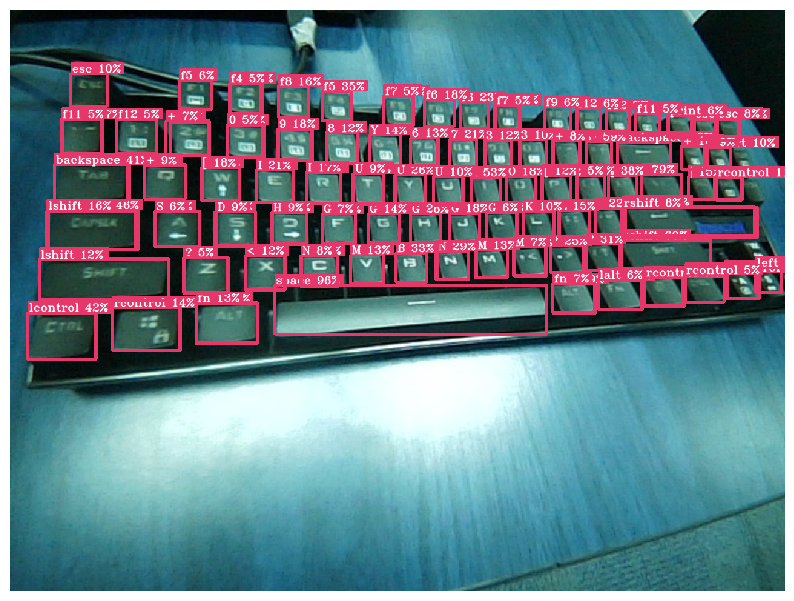

In [17]:
keys = []

pred = random.choice(predictions)
img = pred.orig_img

for box in pred.boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    rect = np.array([(x1, y1), (x2, y1), (x2, y2), (x1, y2)], dtype="int")
    
    crop = crop_rect(img, rect)
    crop = cv2.resize(crop, (64, 64))
    crop = np.rot90(crop, k=-1)
    keys.append(crop)

show_images(keys, figsize=(5, 4))
plot_yolo(pred, scale=2)